**PIA: Entrenamiento de una Red Neuronal convolusional**

 Unidad de aprendizaje: IA yRN
 
* Fatima Yaneth Urrutia Hernández 1957536 IMTC
* Israel Emiliano Vera Solís 1921191 IMTC
* Eduardo Martínez López 1889106 IMTC 

**PASO 1. IMPORTAR LIBRERÍAS**

In [21]:
import numpy as np                                 ##Librerías Importadas 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from PIL import Image
import warnings
from PIL import Image
import cv2 as cv
from tensorflow import keras
from tensorflow.keras import models, layers
import os
import random

**PASO 2. CARGAR DATOS**

In [2]:
train_images = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
test_images = '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'

train_labels = tf.keras.utils.image_dataset_from_directory(train_images)
test_labels= tf.keras.utils.image_dataset_from_directory(test_images)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


**PASO 3. CREAR ETIQUETAS Y SETS DE ENTRENAMIENTO**

In [3]:
vegetables = train_labels.class_names
print(vegetables)
print(len(vegetables)) ## Clases y numemro de Clases  


['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli', 'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']
15


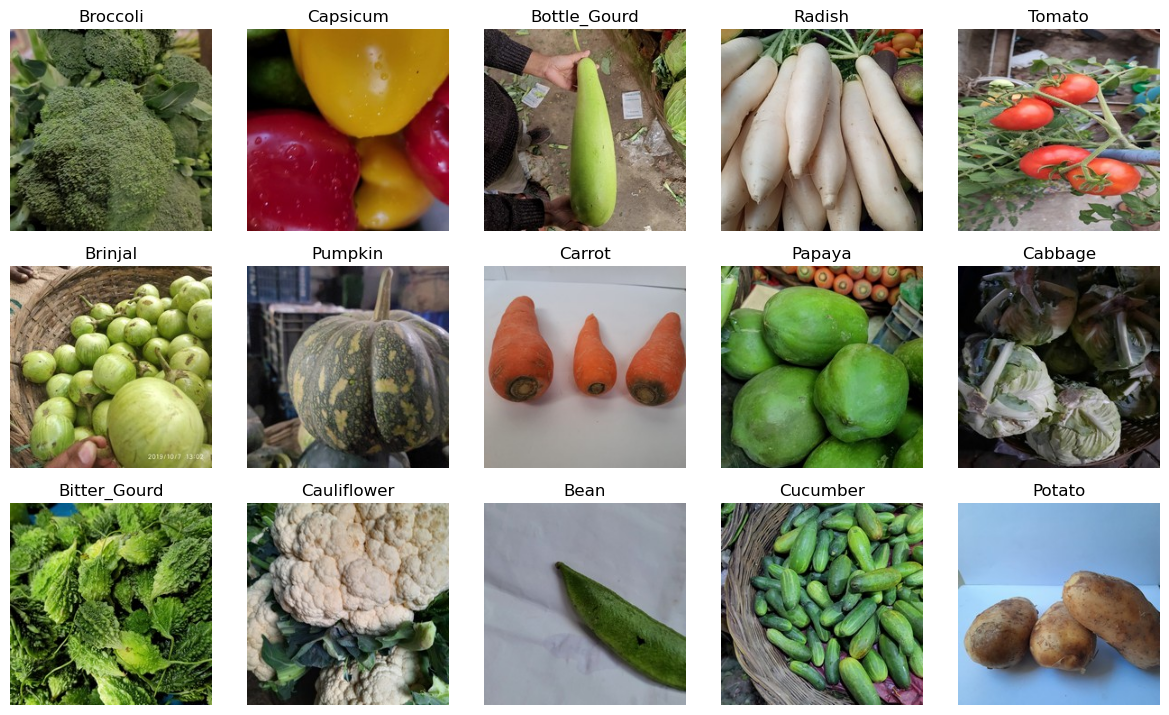

In [4]:
import os 

train_dir = "../input/vegetable-image-dataset/Vegetable Images/train"

image_categories = os.listdir(train_dir)

plt.figure(figsize=(12, 12))

for i, category in enumerate(image_categories):
    image_files = os.listdir(os.path.join(train_dir, category))
    image_file = image_files[0]
    image_path = os.path.join(train_dir, category, image_file)
    image = Image.open(image_path)
    plt.subplot(5, 5, i+1)
    plt.imshow(image)
    plt.title(category)
    plt.axis('off')

plt.tight_layout()

**PASO 4. SELECCIÓN DE MODELO**

In [6]:
model = Sequential()  ## definir el modelo secuencial de la red 

In [7]:

model = models.Sequential()
model.add(layers.Rescaling(1./255, input_shape=(256, 256, 3)))          # Modelo convulcional  

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D())







In [8]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))  #clasificacion
model.add(layers.Dense(len(vegetables)))

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#compilacion 

In [10]:
model.summary() #datos


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)       

**PASO 5. ENTRENAMIENTO**

In [11]:
history = model.fit(train_labels, validation_data= test_labels, epochs=10)

Epoch 1/10
469/469 [==============================] - 602s 1s/step - loss: 1.0775 - accuracy: 0.6513 - val_loss: 0.5858 - val_accuracy: 0.8137
Epoch 2/10
469/469 [==============================] - 599s 1s/step - loss: 0.3819 - accuracy: 0.8838 - val_loss: 0.4238 - val_accuracy: 0.8787
Epoch 3/10
469/469 [==============================] - 598s 1s/step - loss: 0.2135 - accuracy: 0.9366 - val_loss: 0.2987 - val_accuracy: 0.9160
Epoch 4/10
469/469 [==============================] - 598s 1s/step - loss: 0.1256 - accuracy: 0.9603 - val_loss: 0.2919 - val_accuracy: 0.9247
Epoch 5/10
469/469 [==============================] - 596s 1s/step - loss: 0.0926 - accuracy: 0.9709 - val_loss: 0.3219 - val_accuracy: 0.9087
Epoch 6/10
469/469 [==============================] - 597s 1s/step - loss: 0.0606 - accuracy: 0.9802 - val_loss: 0.3300 - val_accuracy: 0.9247
Epoch 7/10
469/469 [==============================] - 601s 1s/step - loss: 0.0652 - accuracy: 0.9807 - val_loss: 0.4679 - val_accuracy: 0.9137

**PASO 6. CURVA DE VALIDACIÓN VS ENTRENAMIENTO**

Text(0.5, 1.0, 'Training and Validation Accuracy')

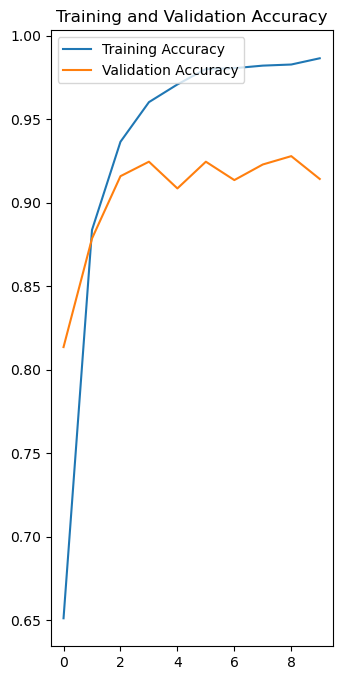

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.title('Training and Validation Accuracy')


**PASO 7. PRUEBA DEL MODELO**

In [13]:
image_paths = []

In [14]:
folder_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)

Imagen seleccionada: /kaggle/input/vegetable-image-dataset/Vegetable Images/test/Potato/1008.jpg


1/1 [==============================] - 0s 159ms/step
This image most likely belongs to Potato with a 100.00 percent confidence.


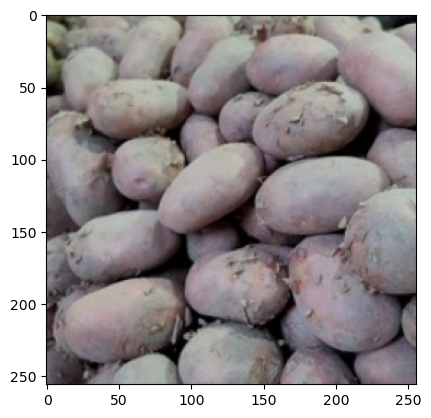

In [15]:
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(vegetables[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()


Imagen seleccionada: /kaggle/input/vegetable-image-dataset/Vegetable Images/test/Pumpkin/1195.jpg
1/1 [==============================] - 0s 34ms/step
This image most likely belongs to Pumpkin with a 100.00 percent confidence.


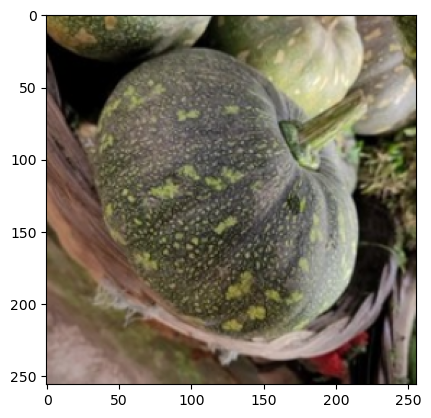

In [16]:
folder_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(vegetables[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()



Imagen seleccionada: /kaggle/input/vegetable-image-dataset/Vegetable Images/test/Radish/1171.jpg
1/1 [==============================] - 0s 33ms/step
This image most likely belongs to Radish with a 90.80 percent confidence.


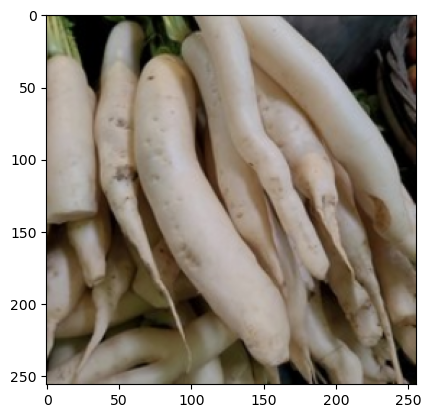

In [17]:
folder_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(vegetables[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()

Imagen seleccionada: /kaggle/input/vegetable-image-dataset/Vegetable Images/test/Capsicum/1074.jpg
1/1 [==============================] - 0s 34ms/step
This image most likely belongs to Capsicum with a 100.00 percent confidence.


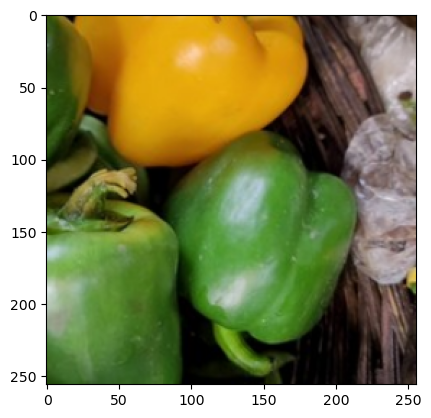

In [18]:
folder_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(vegetables[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()

Imagen seleccionada: /kaggle/input/vegetable-image-dataset/Vegetable Images/test/Potato/1399.jpg
1/1 [==============================] - 0s 36ms/step
This image most likely belongs to Potato with a 100.00 percent confidence.


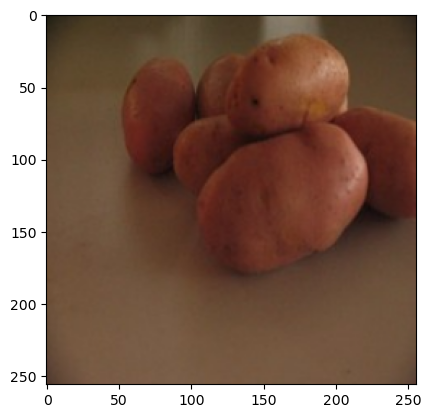

In [19]:
folder_path = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
for root, dirs, files in os.walk(folder_path):
    # Excluye la carpeta principal
    if root != folder_path:
        # Agrega las rutas de las imágenes encontradas
        for file in files:
            image_path = os.path.join(root, file)
            image_paths.append(image_path)

# Selecciona una imagen al azar
random_image_path = random.choice(image_paths)

# Utiliza la imagen seleccionada como desees
print("Imagen seleccionada:", random_image_path)
test_path = random_image_path

img = cv.imread(test_path)
rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
resized = cv.resize(rgb, (256, 256))
img_array = np.expand_dims(resized, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(vegetables[np.argmax(score)], 100 * np.max(score))
)

plt.imshow(resized)
plt.show()
